# HIV Model

Talia Tandler

In [10]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [27]:
R = 1000 #tcells
L = 0 #latent infection
E = 0 #active infection
V = 100 #virions
Γ = 1.36           #Rate at which uninfected CD4 lymphocytes arise
τ = 0.2            #Proportion of cells activated
μ = 1.36e-3     #HIV-independent death rate of uninfected CD4 lymphocytes
β = 0.00027        #Rate of infection of CD4 lymphocytes per virion
ρ = 0.1            #Proportion of cells becoming latently infected upon infection
α = 3.6e-2      #Activation rate of latently infected cells
σ = 2              #Removal rate of cell-free virus
δ = 0.33           #Death rate of actively infected CD4
π = 100            #Rate of production of virions by an actively infected cell


100

In [36]:
HIV_infection = System(R, L, E, V, Γ, τ, μ, β, ρ, α, σ, δ, π)

TypeError: __init__() takes at most one positional argument

In [48]:
init = State(R = 1000, L = 0, E = 0, V = 100)

t0 = 0
tend = 120
dt = 0.1
    
system = System(init=init, t0 = t0, tend = tend, dt=dt,
                  Γ=Γ, τ=τ, μ=μ, β=β, ρ=ρ, α=α, σ=σ, δ=δ, π=π)

,values
init,R 1000 L 0 E 0 V 100 dtype:...
t0,0
tend,120
dt,0.1
Γ,1.36
τ,0.2
μ,0.00136
β,0.00027
ρ,0.1
α,0.036


In [49]:
def update_func (state, t, system):
    
    R, L, E, V = state
    
    dRdt = system.Γ*system.τ - system.μ*R - system.β*R*V
    dLdt = system.ρ*system.β*R*V - system.μ*L - system.α*L
    dEdt = (1-system.ρ)*system.β*R*V + system.α*L - system.δ*E
    dVdt = system.π*E - system.σ*V
    
    R += dRdt * dt
    L += dLdt * dt
    E += dEdt * dt
    V += dVdt * dt
    
    return State(R=R, L=L, E=E, V=V)

In [54]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.tend, system.dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [55]:
results = run_simulation(system, update_func)

,R,L,E,V
0.0,1000,0,0,100
0.1,997.191,0.27,2.43,80
0.2,994.929,0.484385,4.28932,88.3
0.3,992.449,0.719776,6.28433,113.533
0.4,989.299,1.02131,8.81756,153.67
0.5,985.087,1.42796,12.2245,211.111
0.6,979.365,1.98413,16.8797,291.134
0.7,971.56,2.74656,23.2584,401.704
0.8,960.918,3.79005,31.9846,553.947
0.9,946.442,5.2131,43.8775,763.003


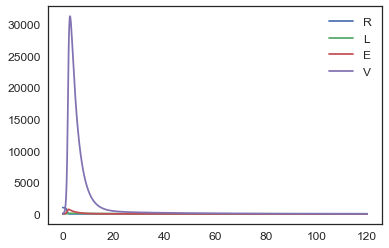

In [56]:
results.plot()

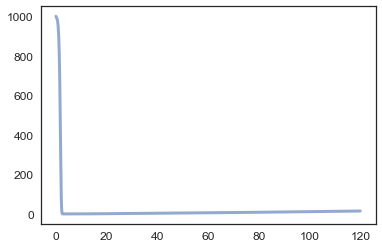

In [59]:
plot(results.R)